In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
def create_train_test_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)
    return X_train, X_test, Y_train, Y_test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [3]:
import os
df = pd.read_csv("data" + os.sep + "mbti_preprocessed_complete.csv")
df.head()

,Unnamed: 0,type,posts,encodedType,preprocessed_posts,extro_intro,intu_obs,feel_think,prosp_judg
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,"['youtube', 'tumblr', 'enfp', 'intj', 'moment'...",0,1,1,0
1,1,ENTP,'I'm finding the lack of me in these posts ver...,3,"['im', 'finding', 'the', 'lack', 'of', 'post',...",1,1,0,1
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,11,"['good', 'one', 'youtube', 'of', 'course', 'i'...",0,1,0,1
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,"['dear', 'intp', 'i', 'enjoyed', 'conversation...",0,1,0,0
4,4,ENTJ,'You're fired.|||That's another silly misconce...,2,"['youre', 'fired', 'thats', 'another', 'silly'...",1,1,0,0


In [4]:
X = df.iloc[:,4].values
Y_EI = df.iloc[:,5].values # E Extroverted (1) - I Introverted (0)
Y_NS = df.iloc[:,6].values # N Intuitive (1) - S Observant (0)
Y_FT = df.iloc[:,7].values # F Feeling (1) - T Thinking (0)
Y_PJ = df.iloc[:,8].values # P Prospective (1) - J Judging (0)
print('Extroverted (1) - Introverted (0)')
display(pd.DataFrame(Y_EI).value_counts())
print('Intuitive (1) -  Observant (0)')
display(pd.DataFrame(Y_NS).value_counts())
print('Feeling (1) - Thinking (0)')
display(pd.DataFrame(Y_FT).value_counts())
print('Prospective (1) - Judging (0)')
display(pd.DataFrame(Y_PJ).value_counts())

tf_idf_vectorizer = TfidfVectorizer(use_idf=True, min_df = 0.1, max_df = 0.3)

X = tf_idf_vectorizer.fit_transform(X).toarray()

Extroverted (1) - Introverted (0)


0    6676
1    1999
dtype: int64

Intuitive (1) -  Observant (0)


1    7478
0    1197
dtype: int64

Feeling (1) - Thinking (0)


1    4694
0    3981
dtype: int64

Prospective (1) - Judging (0)


1    5241
0    3434
dtype: int64

In [5]:

X_train, X_test, Y_train_EI, Y_test_EI = create_train_test_split(X, Y_EI)
X_train, X_test, Y_train_NS, Y_test_NS = create_train_test_split(X, Y_NS)
X_train, X_test, Y_train_FT, Y_test_FT = create_train_test_split(X, Y_FT)
X_train, X_test, Y_train_PJ, Y_test_PJ = create_train_test_split(X, Y_PJ)


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [7]:

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

model = LogisticRegression()
clf = GridSearchCV(model,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='f1_micro',        # metric for scoring
                   cv=10)

clf.fit(X_train, Y_train_EI)

print("Tuned Hyperparameters :", clf.best_params_)
print("F1 :",clf.best_score_)



c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
F1 : 0.8310299791901501


c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

Extroverted - Introverted

In [8]:

model = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
model.fit(X_train, Y_train_EI)

LogisticRegression(penalty='l1', solver='liblinear')

In [9]:
predict_EI = model.predict(X_test)

In [10]:
print("Classification Report:")
print(classification_report(Y_test_EI, predict_EI, target_names=['I','E']))

Classification Report:
              precision    recall  f1-score   support

           I       0.85      0.95      0.90      2002
           E       0.71      0.45      0.55       601

    accuracy                           0.83      2603
   macro avg       0.78      0.70      0.72      2603
weighted avg       0.82      0.83      0.82      2603



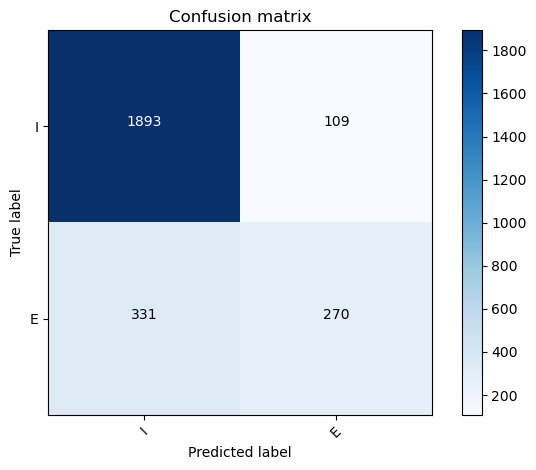

In [11]:
cnf = confusion_matrix(Y_test_EI, predict_EI)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['I','E'])

In [12]:
clf.fit(X_train, Y_train_NS)

print("Tuned Hyperparameters :", clf.best_params_)
print("F1 :",clf.best_score_)

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
F1 : 0.8814231444550419


c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

In [14]:
model = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
model.fit(X_train, Y_train_NS)
predict_NS = model.predict(X_test)


NS: Intuitive - Observant


In [15]:
print("Classification Report:")
print(classification_report(Y_test_NS, predict_NS, target_names=['S','N']))

Classification Report:
              precision    recall  f1-score   support

           S       0.68      0.27      0.39       342
           N       0.90      0.98      0.94      2261

    accuracy                           0.89      2603
   macro avg       0.79      0.62      0.66      2603
weighted avg       0.87      0.89      0.87      2603



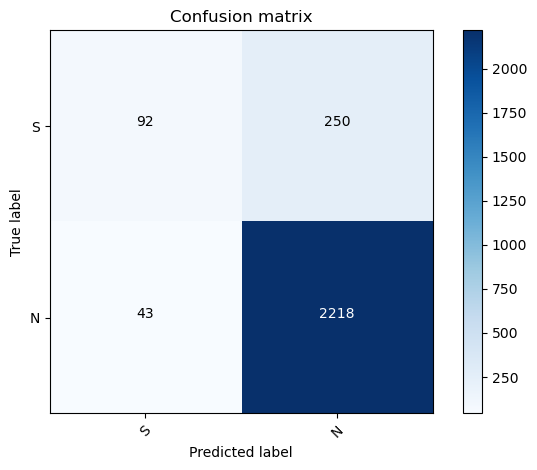

In [16]:
cnf = confusion_matrix(Y_test_NS, predict_NS)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['S','N'])

Feeling - Thinking

In [17]:
clf.fit(X_train, Y_train_FT)

print("Tuned Hyperparameters :", clf.best_params_)
print("F1 :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
F1 : 0.8132427057140379


c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

In [18]:
model = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
model.fit(X_train, Y_train_FT)
predict_FT = model.predict(X_test)


In [19]:
print("Classification Report:")
print(classification_report(Y_test_FT, predict_FT, target_names=['T','F']))

Classification Report:
              precision    recall  f1-score   support

           T       0.80      0.76      0.78      1199
           F       0.80      0.84      0.82      1404

    accuracy                           0.80      2603
   macro avg       0.80      0.80      0.80      2603
weighted avg       0.80      0.80      0.80      2603



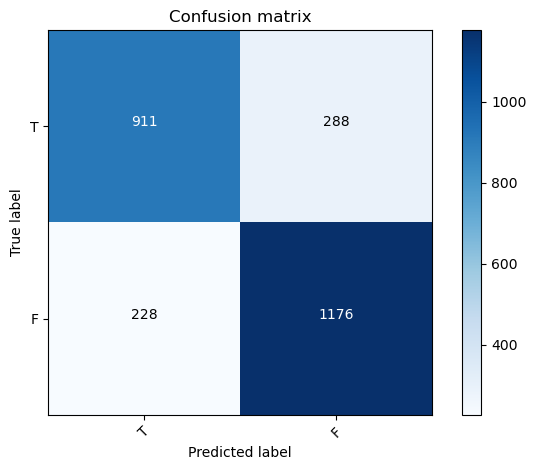

In [20]:
cnf = confusion_matrix(Y_test_FT, predict_FT)
np.set_printoptions(precision = 2)
plot_confusion_matrix(cnf, classes = ['T','F'])

Prospective - Judging

In [21]:
clf.fit(X_train, Y_train_PJ)

print("Tuned Hyperparameters :", clf.best_params_)
print("F1 :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
F1 : 0.7564242283013959


c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

In [22]:
model = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
model.fit(X_train, Y_train_PJ)
predict_PJ = model.predict(X_test)

In [23]:
print("Classification Report:")
print(classification_report(Y_test_PJ, predict_PJ, target_names=['J','P']))

Classification Report:
              precision    recall  f1-score   support

           J       0.77      0.56      0.65      1071
           P       0.74      0.88      0.81      1532

    accuracy                           0.75      2603
   macro avg       0.76      0.72      0.73      2603
weighted avg       0.75      0.75      0.74      2603



In [24]:
df1 = df[['encodedType', 'extro_intro', 'intu_obs', 'feel_think', 'prosp_judg']].drop_duplicates().reset_index(drop=True)
df1

,encodedType,extro_intro,intu_obs,feel_think,prosp_judg
0,8,0,1,1,0
1,3,1,1,0,1
2,11,0,1,0,1
3,10,0,1,0,0
4,2,1,1,0,0
5,0,1,1,1,0
6,9,0,1,1,1
7,1,1,1,1,1
8,13,0,0,1,1
9,15,0,0,0,1


In [25]:
Y_test_df = pd.DataFrame(np.transpose([Y_test_EI, Y_test_PJ, Y_test_NS, Y_test_FT]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
Y_test_df = Y_test_df.merge(df1, how = 'left', on = Y_test_df.columns.tolist())
Y_test_df

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType
0,1,0,1,1,5
1,0,1,1,0,8
2,1,0,1,0,4
3,0,1,1,0,8
4,0,0,1,0,12
...,...,...,...,...,...
2598,0,1,1,0,8
2599,0,1,1,0,8
2600,0,0,1,1,13
2601,0,0,1,0,12


In [26]:
predict_df = pd.DataFrame(np.transpose([predict_EI, predict_PJ, predict_NS, predict_FT]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
predict_df = predict_df.merge(df1, how = 'left', on = predict_df.columns.tolist())
predict_df

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType
0,0,0,1,1,13
1,0,1,0,0,10
2,0,1,1,0,8
3,0,1,1,0,8
4,0,0,1,0,12
...,...,...,...,...,...
2598,0,1,1,0,8
2599,0,1,1,0,8
2600,1,0,1,1,5
2601,0,1,1,0,8


In [27]:
print("Classification Report:")
print(classification_report(Y_test_df['encodedType'].values, predict_df['encodedType'].values))
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(Y_test_df['encodedType'].values, predict_df['encodedType'].values, average='micro'))

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       196
           1       0.51      0.31      0.39       212
           2       0.50      0.07      0.12        28
           3       0.00      0.00      0.00        14
           4       0.37      0.18      0.24        74
           5       0.15      0.11      0.12        55
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        11
           8       0.41      0.65      0.50       378
           9       0.49      0.74      0.59       545
          10       0.50      0.26      0.34        86
          11       0.34      0.21      0.26        73
          12       0.54      0.41      0.46       365
          13       0.55      0.50      0.52       436
          14       0.69      0.15      0.24        61
          15       0.59      0.28      0.38        58

    accuracy                           0.48      2603
   

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
